In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
import numpy as np
from configs import *
import matplotlib.pyplot as plt
import cv2
import sys
from scipy.ndimage import gaussian_filter as blur
import math
from annotate import *
from utils import *
from configs import *

In [3]:
meshDir = '_meshes'
procDir = '_procd'

In [4]:
markupfiles = sorted(glob('_meshes/*.obj'))
framefiles = sorted(
    glob('_captures/*.jpg'), 
    key=lambda ent: int(ent.split(sep)[1][6:-4]))

In [5]:
fname = framefiles[3]
print(fname)
fhash = fname.split(sep)[-1][:-4]
# status = '[%d/%d : %s]' % (ii+1, len(framefiles), fhash)
status = '[%d/%d : %s]' % (1, len(framefiles), fhash)
joints, tris = find_joints(status, fhash, markupfiles)

_captures/05968-4500.jpg


In [6]:
print(len(joints))

98


In [7]:
from annotate import *
from utils import *
from configs import *

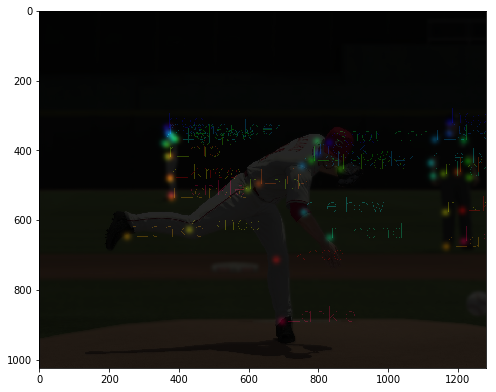

In [8]:
im = draw_joints(fhash, 'joints', joints)
plt.figure(figsize=(8,8))
plt.imshow(im)
plt.show();plt.close()

In [9]:
skels, bad = collect_skeletons(joints)
for batch in bad:
    for ent in batch:
        print(ent['matched']['name'], ent['pcount'], ent['file'])
#     print(len(batch))
    print()

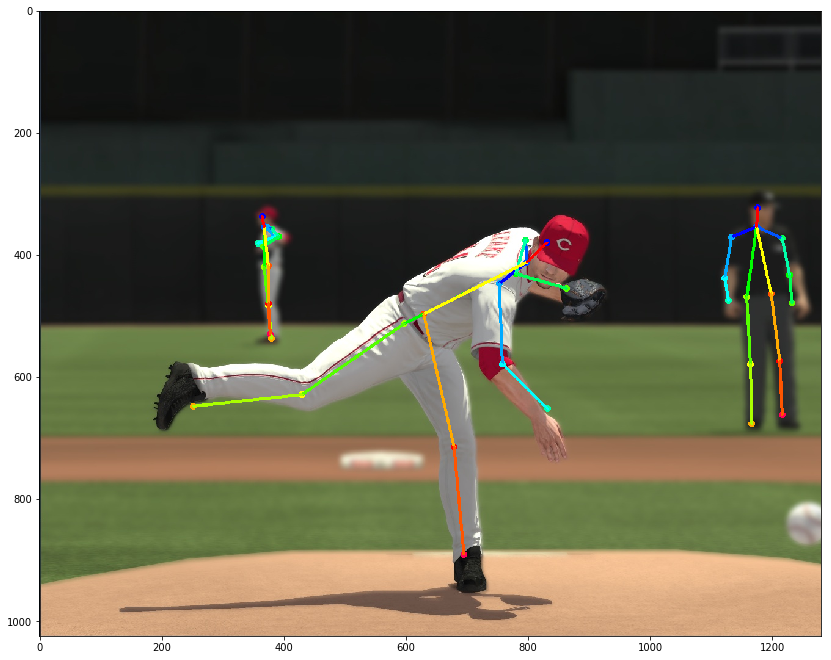

In [10]:
img = draw_skeletons(fhash, skels)
plt.figure(figsize=(14, 14))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show(); plt.close()